In [1]:
import pandas as pd; 
import numpy as np; 
import matplotlib.pyplot as plt; 
import seaborn as sns
from math import atan 
%matplotlib inline
sns.set_context('talk', font_scale=.9)
from sympy import * 
from scipy.constants import *

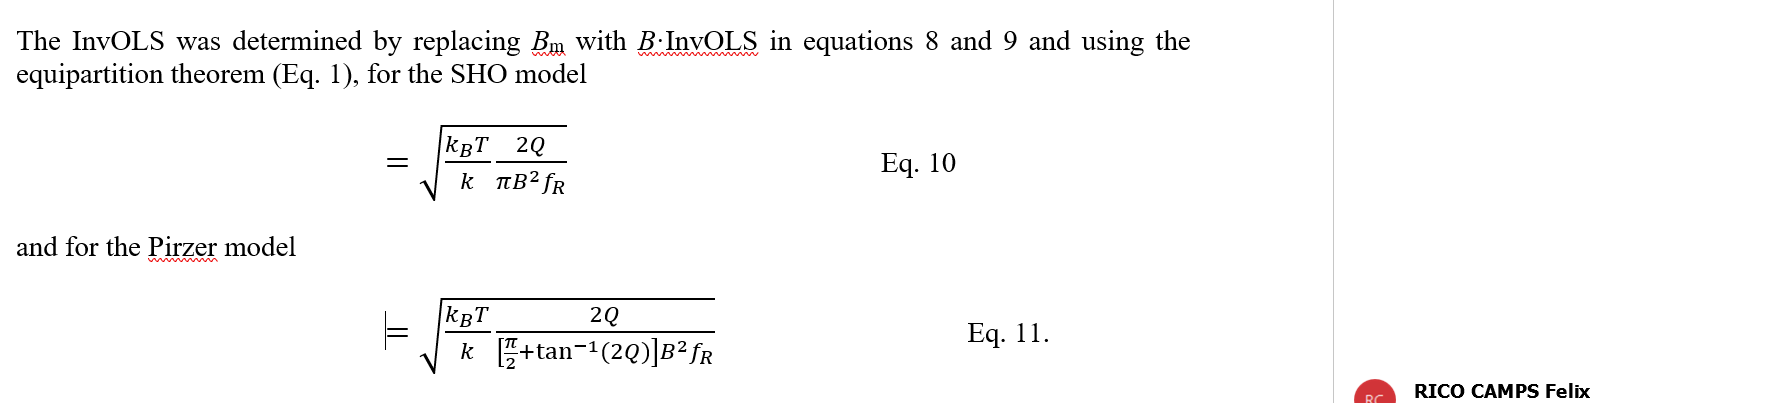

# InvOLS error propagation estimation

Convention

* sho: InvOLS_SHO

* pirzer: InvOLS_Pirzer



In [2]:
# first thing: define the symbols

k1, Q, fr, B, kB, T, p, dB, dQ, dfr = symbols('k_1 Q f_r B k_B T pi delta_B delta_Q dfr')

### $InvOLS_{free,SHO}$

$$ \frac{1}{B} \left( \frac{k_B  T  \,2Q} { k_1  \, \pi \,  f_r} \right)^{1/2}$$

In [3]:
sho = 1/B *( kB * T * 2*Q / (k1 * p  *fr) )**(1/2)
print('InvOLS_SHO')
N(sho,5)

InvOLS_SHO


1.4142*(Q*T*k_B/(f_r*k_1*pi))**0.5/B

In [4]:
pirzer = 1/B *( kB * T * 2*Q / (k1 * p  *fr *( p/2 + atan(2*Q))) )**(1/2)
print('InvOLS_Pirzer')
N(pirzer,5)

InvOLS_Pirzer


1.4142*(Q*T*k_B/(f_r*k_1*pi*(0.5*pi + atan(2*Q))))**0.5/B

## error propagation

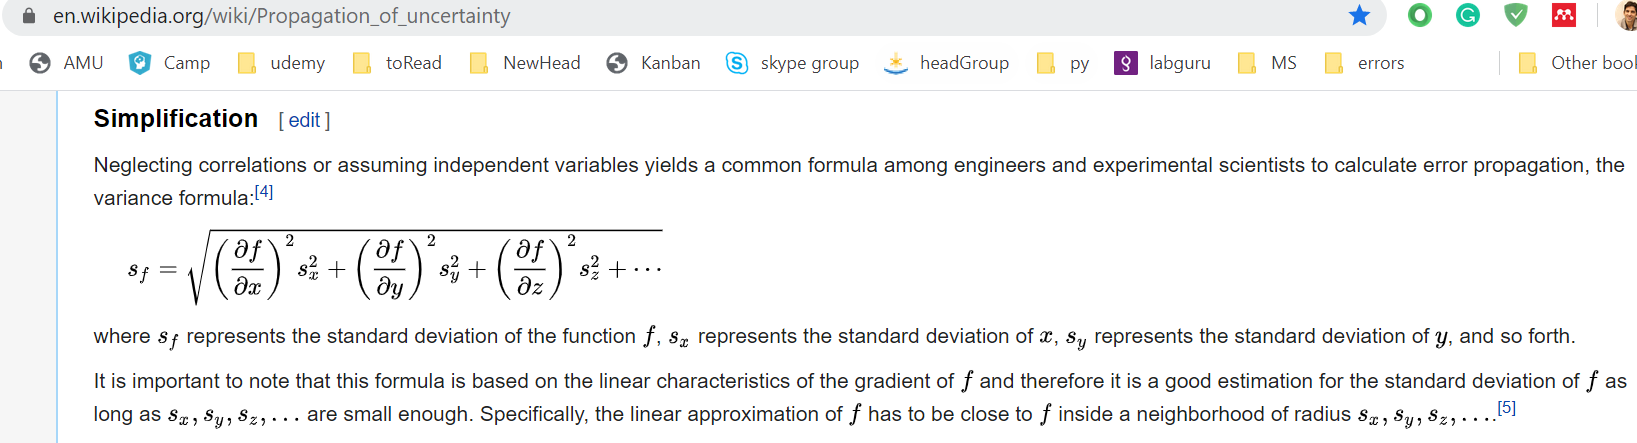


In the first approach, I only considered B and Q are the main sources of error. So I will do the propagation for them only. 
I will consider B nd Q are independent among each other. k_c is not independent, but I will assume (in a first approach), that it is not asimportant as B and Q.

The new approach includes fr, for the sake of comparison

#### SD SHO

In [5]:
Bterm_sho = (sho.diff(B)*dB)**2 
Qterm_sho = (sho.diff(Q)*dQ)**2
frterm_sho = (sho.diff(fr)*dfr)**2
sd_sho = simplify(( Bterm_sho + Qterm_sho + frterm_sho )**.5)
N(sd_sho,5) 

1.4142*((Q*T*k_B/(f_r*k_1*pi))**1.0*(0.25*B**2*Q**2*dfr**2 + 0.25*B**2*delta_Q**2*f_r**2 + Q**2*delta_B**2*f_r**2)/(B**4*Q**2*f_r**2))**0.5

#### Relative error SHO

In [6]:
re_sho = simplify(sd_sho/sho)
N(sd_sho,5)

1.4142*((Q*T*k_B/(f_r*k_1*pi))**1.0*(0.25*B**2*Q**2*dfr**2 + 0.25*B**2*delta_Q**2*f_r**2 + Q**2*delta_B**2*f_r**2)/(B**4*Q**2*f_r**2))**0.5

#### SD Pirzer

In [7]:
Bterm_pirzer = (pirzer.diff(B)*dB)**2 
Qterm_pirzer = (pirzer.diff(Q)*dQ)**2
frterm_pirzer = (pirzer.diff(fr)*dfr)**2
sd_pirzer = simplify(( Bterm_pirzer + Qterm_pirzer + frterm_pirzer )**.5)
N(sd_pirzer,5) 

0.17678*((Q*T*k_B/(f_r*k_1*pi*(pi + 2.0*atan(2*Q))))**1.0*(32.0*B**2*Q**2*dfr**2*(Q**2 + 0.25)**2*(0.5*pi + atan(2*Q))**2 + 8.0*B**2*delta_Q**2*f_r**2*(Q - 0.25*(4.0*Q**2 + 1.0)*(pi + 2.0*atan(2*Q)))**2 + 128.0*Q**2*delta_B**2*f_r**2*(Q**2 + 0.25)**2*(0.5*pi + atan(2*Q))**2)/(B**4*Q**2*f_r**2*(Q**2 + 0.25)**2*(0.5*pi + atan(2*Q))**2))**0.5

#### Relative error Pirzer

In [8]:
re_pirzer = simplify(sd_pirzer/pirzer)
N(sd_pirzer,5)

0.17678*((Q*T*k_B/(f_r*k_1*pi*(pi + 2.0*atan(2*Q))))**1.0*(32.0*B**2*Q**2*dfr**2*(Q**2 + 0.25)**2*(0.5*pi + atan(2*Q))**2 + 8.0*B**2*delta_Q**2*f_r**2*(Q - 0.25*(4.0*Q**2 + 1.0)*(pi + 2.0*atan(2*Q)))**2 + 128.0*Q**2*delta_B**2*f_r**2*(Q**2 + 0.25)**2*(0.5*pi + atan(2*Q))**2)/(B**4*Q**2*f_r**2*(Q**2 + 0.25)**2*(0.5*pi + atan(2*Q))**2))**0.5

## case AC40, SHO 


B fom AC40 spectra from PS-NEX, not from MATLAB GUI because there is converted to a.u.

k_C from manuscript (air values)



## AC40 liquid

In [9]:
valB = 6.8e-6; reB = .2020
valQ = 1.88; reQ = .1942
valfr = 28772; refr = .003906

ac40liq = [(kB, Boltzmann),(T,300),(p,pi),(B, valB),(Q, valQ),(fr, valfr ),(dB, reB*valB),
           (dQ, reQ*valQ), (dfr, refr*valfr),(k1, .089/.971) ] 

### SHO

In [10]:
sho40liq = sho.subs(ac40liq)
sd_sho40liq = sd_sho.subs(ac40liq)
re_sho40liq = re_sho.subs(ac40liq)

print('InvOLS_free,sho = {0:3.0f} nm/V'.format(1e9*sho40liq))
print('\t sd = {0:3.0f} nm/V'.format(1e9*sd_sho40liq))
print('\t relative error = {0:3.0f} %'.format(100*re_sho40liq))
print('\n\n relative error of: B = {0:3.0f} %, Q = {1:3.0f} %, fr = {2:3.2f} % '.format(reB*100, reQ*100, refr*100))
print('\n contribution to relative error of InvOLS of: B = {0:3.2f} %, Q = {1:3.2f} %, fr = {2:3.2f} % '.
      format(100*Bterm_sho.subs(ac40liq)/sd_sho40liq**2,
             100*Qterm_sho.subs(ac40liq)/sd_sho40liq**2,
             100*frterm_sho.subs(ac40liq)/sd_sho40liq**2))

InvOLS_free,sho = 202 nm/V
	 sd =  45 nm/V
	 relative error =  22 %


 relative error of: B =  20 %, Q =  19 %, fr = 0.39 % 

 contribution to relative error of InvOLS of: B = 81.22 %, Q = 18.77 %, fr = 0.01 % 


#### Pirzer 

In [11]:

pirzer40liq = pirzer.subs(ac40liq)
sd_pirzer40liq = sd_pirzer.subs(ac40liq)
re_pirzer40liq = re_pirzer.subs(ac40liq)

print('InvOLS_free,pirzer = {0:3.0f} nm/V'.format(1e9*pirzer40liq))
print('\t sd = {0:3.0f} nm/V'.format(1e9*sd_pirzer40liq))
print('\t relative error = {0:3.0f} %'.format(100*re_pirzer40liq))
print('\n\n relative error of: B = {0:3.0f} %, Q = {1:3.0f} %, fr = {2:3.2f} % '.format(reB*100, reQ*100, refr*100))
print('\n contribution to relative error of InvOLS of: B = {0:3.2f} %, Q = {1:3.2f} %, fr = {2:3.2f} % '.
      format(100*Bterm_pirzer.subs(ac40liq)/sd_pirzer40liq**2,
             100*Qterm_pirzer.subs(ac40liq)/sd_pirzer40liq**2,
             100*frterm_pirzer.subs(ac40liq)/sd_pirzer40liq**2))

InvOLS_free,pirzer = 119 nm/V
	 sd =  26 nm/V
	 relative error =  22 %


 relative error of: B =  20 %, Q =  19 %, fr = 0.39 % 

 contribution to relative error of InvOLS of: B = 83.82 %, Q = 16.17 %, fr = 0.01 % 


## AC10

In [12]:
valB = .0447/(20e3); reB = .05395
valQ = 1.295; reQ = .0510
valfr = 571000; refr = .001498

ac10liq = [(kB, Boltzmann),(T,300),(p,pi),(B, valB),(Q, valQ),(fr, valfr ),(dB, reB*valB),
           (dQ, reQ*valQ), (dfr, refr*valfr),(k1, .164/.971) ] 

### SHO

In [13]:
sho10liq = sho.subs(ac10liq)
sd_sho10liq = sd_sho.subs(ac10liq)
re_sho10liq = re_sho.subs(ac10liq)

print('InvOLS_free,sho = {0:3.0f} nm/V'.format(1e9*sho10liq))
print('\t sd = {0:3.0f} nm/V'.format(1e9*sd_sho10liq))
print('\t relative error = {0:3.0f} %'.format(100*re_sho10liq))

print('\n\n relative error of: B = {0:3.2f} %, Q = {1:3.2f} %, fr = {2:3.2f} % '.
      format(reB*100, reQ*100, refr*100))

print('\n contribution to relative error of InvOLS of: B = {0:3.3f} %, Q = {1:3.3f} %, fr = {2:3.3f} % '.
      format(100*Bterm_sho.subs(ac10liq)/sd_sho10liq**2,
             100*Qterm_sho.subs(ac10liq)/sd_sho10liq**2,
             100*frterm_sho.subs(ac10liq)/sd_sho10liq**2))

InvOLS_free,sho =  84 nm/V
	 sd =   5 nm/V
	 relative error =   6 %


 relative error of: B = 5.39 %, Q = 5.10 %, fr = 0.15 % 

 contribution to relative error of InvOLS of: B = 81.726 %, Q = 18.258 %, fr = 0.016 % 


### Pirzer

In [14]:
pirzer10liq = pirzer.subs(ac10liq)
sd_pirzer10liq = sd_pirzer.subs(ac10liq)
re_pirzer10liq = re_pirzer.subs(ac10liq)

print('InvOLS_free,pirzer = {0:3.0f} nm/V'.format(1e9*pirzer10liq))
print('\t sd = {0:3.0f} nm/V'.format(1e9*sd_pirzer10liq))
print('\t relative error = {0:3.0f} %'.format(100*re_pirzer10liq))

print('\n\n relative error of: B = {0:3.2f} %, Q = {1:3.2f} %, fr = {2:3.2f} % '.
      format(reB*100, reQ*100, refr*100))

print('\n contribution to relative error of InvOLS of: B = {0:3.2f} %, Q = {1:3.2f} %, fr = {2:3.2f} % '.
      format(100*Bterm_pirzer.subs(ac10liq)/sd_pirzer10liq**2,
             100*Qterm_pirzer.subs(ac10liq)/sd_pirzer10liq**2,
             100*frterm_pirzer.subs(ac10liq)/sd_pirzer10liq**2))

InvOLS_free,pirzer =  51 nm/V
	 sd =   3 nm/V
	 relative error =   6 %


 relative error of: B = 5.39 %, Q = 5.10 %, fr = 0.15 % 

 contribution to relative error of InvOLS of: B = 85.27 %, Q = 14.71 %, fr = 0.02 % 
